In [1]:
# pip install pandas openpyxl matplotlib seaborn numpy


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:


# Load the CSV file
csv_file_path = 'Ignite_Program_Cohort_2 (1).csv'  # Replace with the actual path to your CSV file
csv_data = pd.read_csv(csv_file_path)

# Display the first few rows of the CSV file
print(csv_data.head())


     Surname        First Name             Email Address  THEORY-9/11/2024  \
0     Points               NaN                       NaN              30.0   
1        NaN              76ix     phemelo1307@gmail.com               NaN   
2  ABDULLAHI          ABUBAKAR    siddeeqtech1@gmail.com               NaN   
3        NaN   Abson T Muzvuru  abson99muzvuru@gmail.com               NaN   
4     Muyobo  Adam Musakabantu      muyoboadam@gmail.com              26.0   

   ASSIGNMENT_2-9/12/2024  PRACTICAL-9/14/2024  PRACTICAL-9/15/2024  \
0                    30.0                 20.0                 50.0   
1                     NaN                  1.0                  NaN   
2                     NaN                  1.0                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                 20.0                 30.0   

   practical-9/29/2024  ASSIGNMENT_3-9/30/2024  practical-10/6/2024  \
0                 20.0           

# analyze Marks of students.

In [4]:
# Create a DataFrame
df = pd.DataFrame(csv_data)

# Output the DataFrame
print(df)

       Surname                  First Name                 Email Address  \
0       Points                         NaN                           NaN   
1          NaN                        76ix         phemelo1307@gmail.com   
2    ABDULLAHI                    ABUBAKAR        siddeeqtech1@gmail.com   
3          NaN             Abson T Muzvuru      abson99muzvuru@gmail.com   
4       Muyobo            Adam Musakabantu          muyoboadam@gmail.com   
..         ...                         ...                           ...   
111    umutoni  mariette imana irahari pee         umumarididi@gmail.com   
112  musinguzi                       oscar  oscarmusinguzi2001@gmail.com   
113     mwangi                        tony          tonymwangz@gmail.com   
114     jokhun                      vikram            vjokhun1@gmail.com   
115   tafadzwa                      walter            wchapera@gmail.com   

     THEORY-9/11/2024  ASSIGNMENT_2-9/12/2024  PRACTICAL-9/14/2024  \
0                

In [5]:
# Exclude these columns from replacing NaN values
columns_to_exclude = ['Surname', 'First Name', 'Email Address']

# Replace NaN values with 0 for all columns except the excluded ones
df.loc[:, ~df.columns.isin(columns_to_exclude)] = df.loc[:, ~df.columns.isin(columns_to_exclude)].fillna(0)

# Convert numeric columns to float
numeric_columns = df.columns.drop(columns_to_exclude)
df[numeric_columns] = df[numeric_columns].astype(float)

# Calculate percentage for each column
for column in numeric_columns:
    max_value = df.iloc[0][column]
    df[column] = (df[column] / max_value) * 100
df['Average Score'] = df[numeric_columns].mean(axis=1)

print(df.head(20))

      Surname        First Name                    Email Address  \
0      Points               NaN                              NaN   
1         NaN              76ix            phemelo1307@gmail.com   
2   ABDULLAHI          ABUBAKAR           siddeeqtech1@gmail.com   
3         NaN   Abson T Muzvuru         abson99muzvuru@gmail.com   
4      Muyobo  Adam Musakabantu             muyoboadam@gmail.com   
5      Situma             Agnes            aggiesituma@gmail.com   
6        Akum               Ann             annakum510@gmail.com   
7         NaN       Anti Social     forthepeopleonly01@gmail.com   
8    Kampamba            Benson       bensonkampamba66@gmail.com   
9       Dondi            Brivia            briviadondi@gmail.com   
10    Thierry            Buliro        thierrysiscob13@gmail.com   
11      NGUGI          CAROLINE         wcarolinengugi@gmail.com   
12  Sendawula            Calvin     calvinsendawula188@gmail.com   
13    Tusiime         Catherine               ct

In [6]:
# Remove the first row (which contained the max values)
df = df.iloc[1:].reset_index(drop=True)
print(df.head(20))

      Surname        First Name                    Email Address  \
0         NaN              76ix            phemelo1307@gmail.com   
1   ABDULLAHI          ABUBAKAR           siddeeqtech1@gmail.com   
2         NaN   Abson T Muzvuru         abson99muzvuru@gmail.com   
3      Muyobo  Adam Musakabantu             muyoboadam@gmail.com   
4      Situma             Agnes            aggiesituma@gmail.com   
5        Akum               Ann             annakum510@gmail.com   
6         NaN       Anti Social     forthepeopleonly01@gmail.com   
7    Kampamba            Benson       bensonkampamba66@gmail.com   
8       Dondi            Brivia            briviadondi@gmail.com   
9     Thierry            Buliro        thierrysiscob13@gmail.com   
10      NGUGI          CAROLINE         wcarolinengugi@gmail.com   
11  Sendawula            Calvin     calvinsendawula188@gmail.com   
12    Tusiime         Catherine               ctcathyt@gmail.com   
13      Okisa         Celestine          celeine

In [7]:
def plot_distribution(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [8]:
# Analyze overall performance
df['Average Score'] = df[numeric_columns].mean(axis=1)
print("Overall Performance Statistics:")
print(df['Average Score'].describe())


Overall Performance Statistics:
count    115.000000
mean      14.786473
std       16.059471
min        0.000000
25%        0.555556
50%       10.555556
75%       27.333333
max       75.555556
Name: Average Score, dtype: float64


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


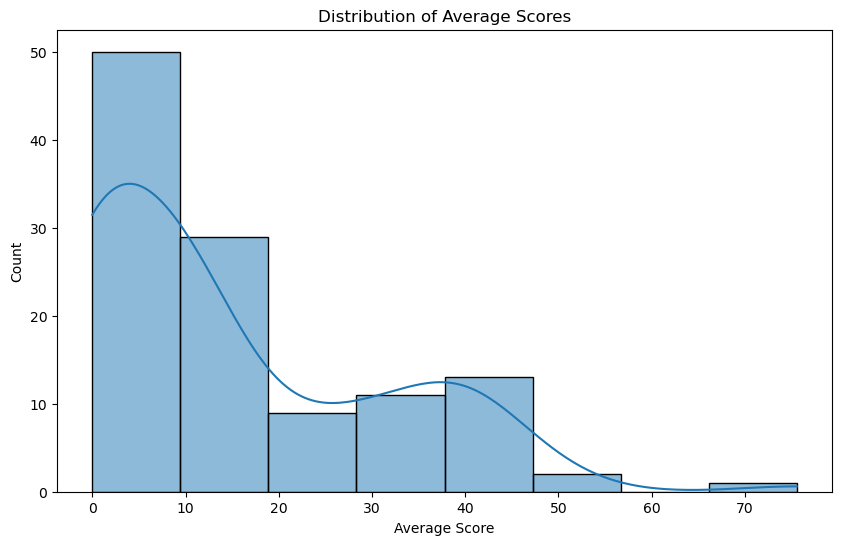

In [9]:
# Plot overall score distribution
plot_distribution(df['Average Score'], 'Distribution of Average Scores', 'Average Score', 'Count')


In [10]:
# Top 10 performers
print("\nTop 10 Performers:")
print(df.nlargest(10, 'Average Score')[['Surname', 'First Name', 'Average Score']])



Top 10 Performers:
         Surname        First Name  Average Score
34         Kaddu          Innocent      75.555556
98           NaN          Victoria      50.555556
29       Oletile              Fela      48.000000
3         Muyobo  Adam Musakabantu      45.185185
68      Emmanuel           Nsubuga      44.444444
52           NaN      Legooramotho      43.259259
36  Martin frank          Isingoma      42.592593
51     Chepkemoi             Laura      41.481481
41         Laker             Jessy      40.185185
22       Fadhili             Denis      40.111111


In [11]:
# Bottom 10 performers
print("\nBottom 10 Performers:")
print(df.nsmallest(10, 'Average Score')[['Surname', 'First Name', 'Average Score']])



Bottom 10 Performers:
      Surname       First Name  Average Score
2         NaN  Abson T Muzvuru       0.000000
20      Muniu             Dave       0.000000
28   Katwamba           Edward       0.000000
73    Ayebale          Paphras       0.000000
74    Ayebale          Paphras       0.000000
82    Wachera             Rose       0.000000
84      Siywa             Ryan       0.000000
94      Muema            Tonny       0.000000
0         NaN             76ix       0.555556
1   ABDULLAHI         ABUBAKAR       0.555556



THEORY-9/11/2024 Performance Statistics:
count    115.000000
mean      48.782609
std       44.711182
min        0.000000
25%        0.000000
50%       80.000000
75%       90.000000
max       96.666667
Name: THEORY-9/11/2024, dtype: float64


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


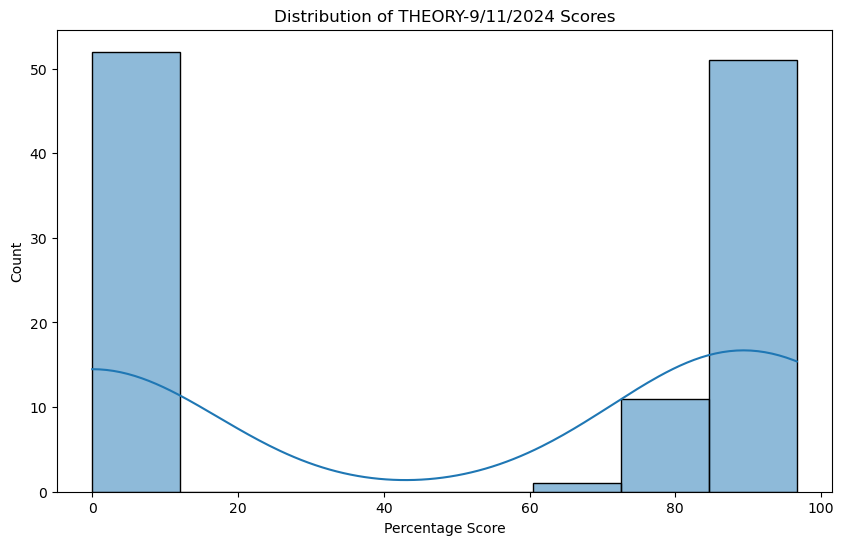


ASSIGNMENT_2-9/12/2024 Performance Statistics:
count    115.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: ASSIGNMENT_2-9/12/2024, dtype: float64


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


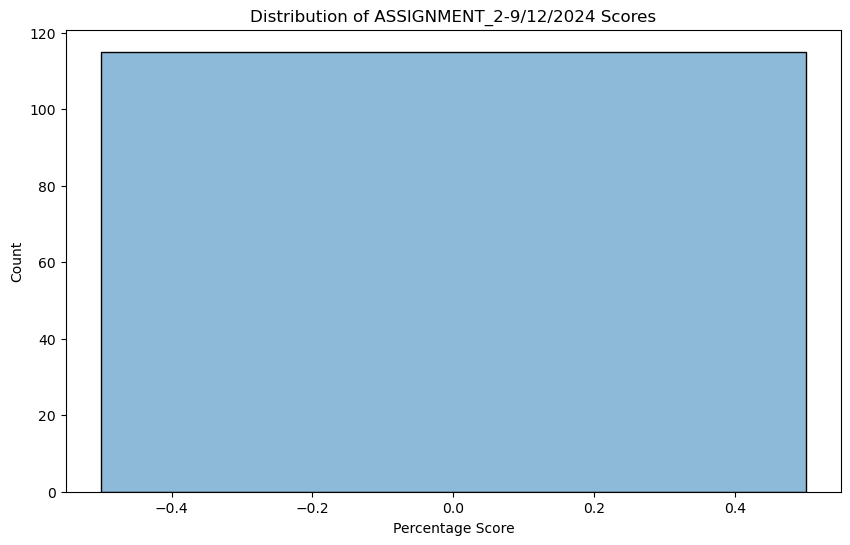


PRACTICAL-9/14/2024 Performance Statistics:
count    115.000000
mean      32.043478
std       35.490891
min        0.000000
25%        5.000000
50%        5.000000
75%       65.000000
max      100.000000
Name: PRACTICAL-9/14/2024, dtype: float64


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


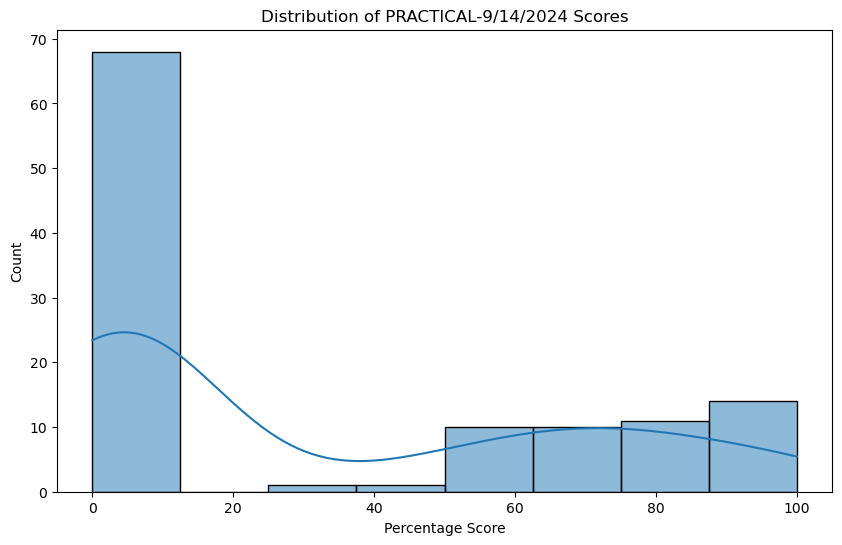


PRACTICAL-9/15/2024 Performance Statistics:
count    115.000000
mean      25.947826
std       42.167969
min        0.000000
25%        0.000000
50%        0.000000
75%       90.000000
max      100.000000
Name: PRACTICAL-9/15/2024, dtype: float64


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


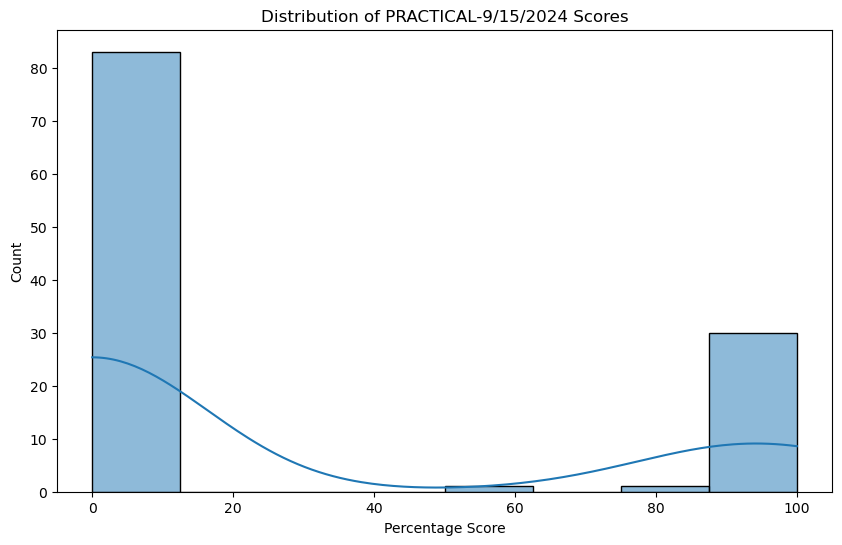


practical-9/29/2024 Performance Statistics:
count    115.000000
mean      19.347826
std       39.467518
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      100.000000
Name: practical-9/29/2024, dtype: float64


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


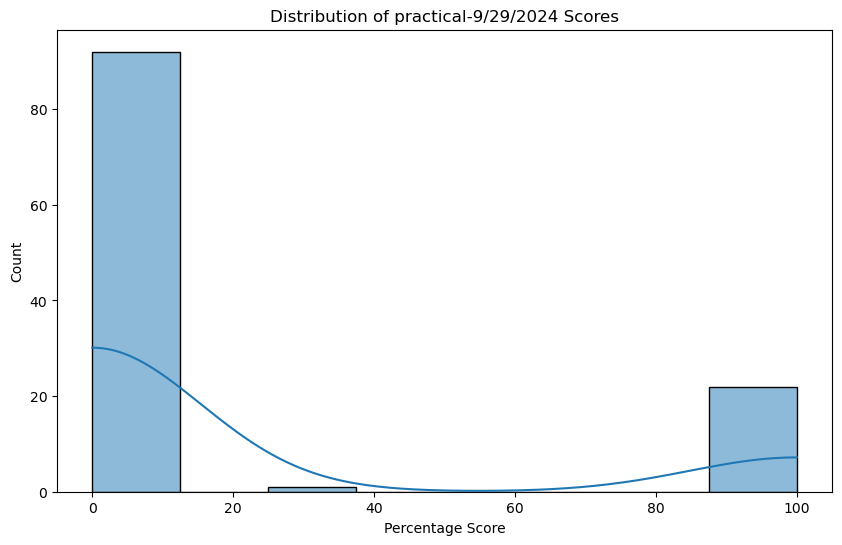


ASSIGNMENT_3-9/30/2024 Performance Statistics:
count    115.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: ASSIGNMENT_3-9/30/2024, dtype: float64


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


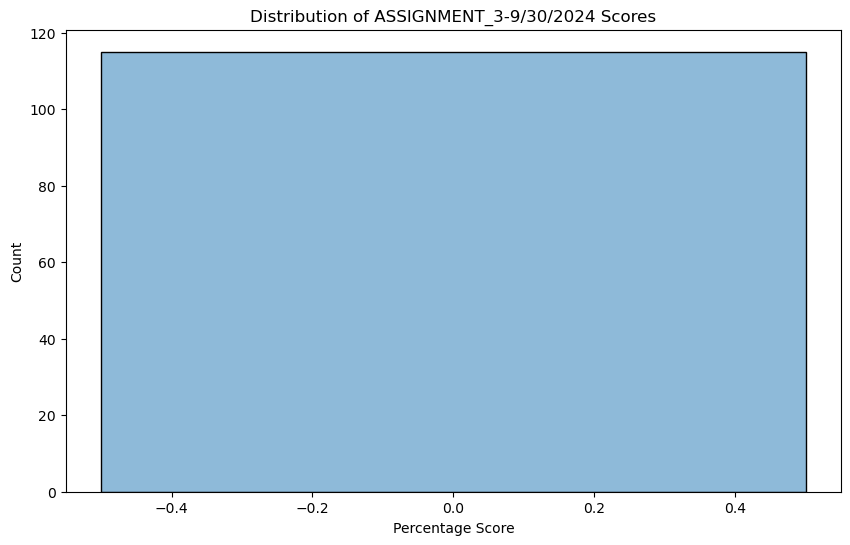


practical-10/6/2024 Performance Statistics:
count    115.000000
mean       5.217391
std       19.971375
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      100.000000
Name: practical-10/6/2024, dtype: float64


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


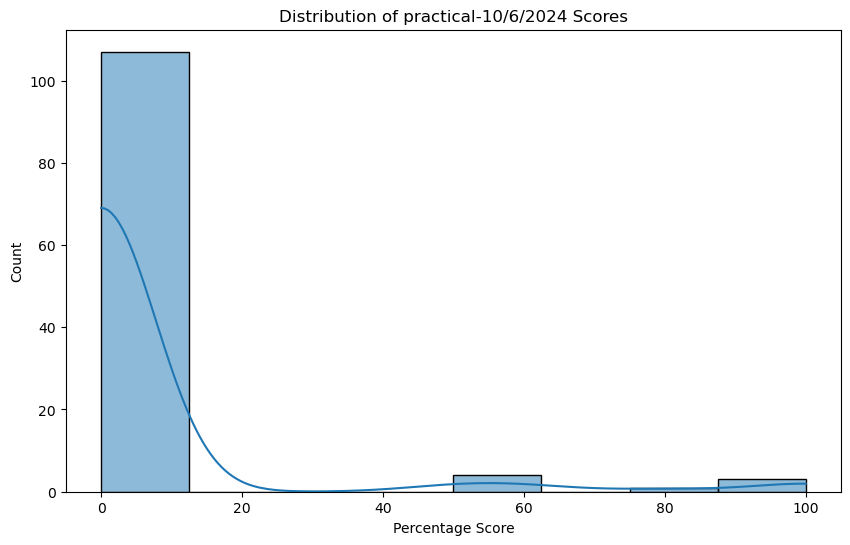


practical-10/12/2024 Performance Statistics:
count    115.000000
mean       0.869565
std        9.325048
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      100.000000
Name: practical-10/12/2024, dtype: float64


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


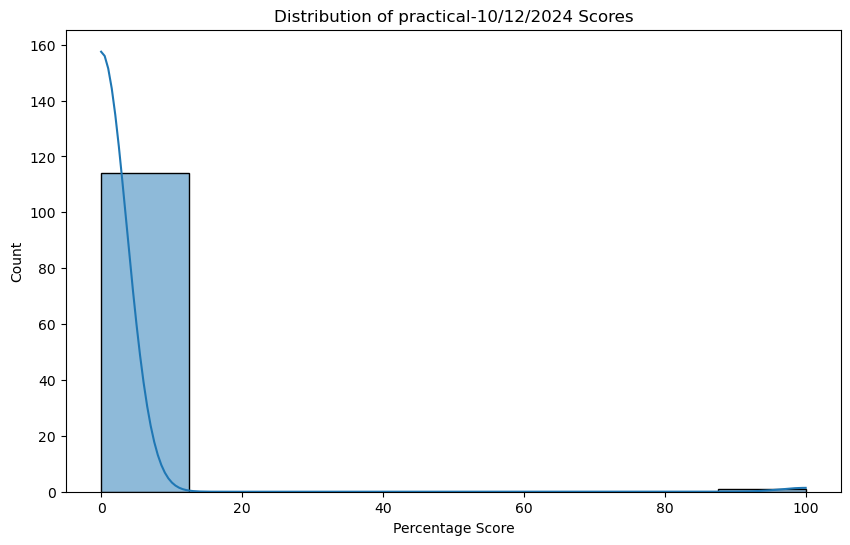


practical-10/13/2024 Performance Statistics:
count    115.000000
mean       0.869565
std        9.325048
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      100.000000
Name: practical-10/13/2024, dtype: float64


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


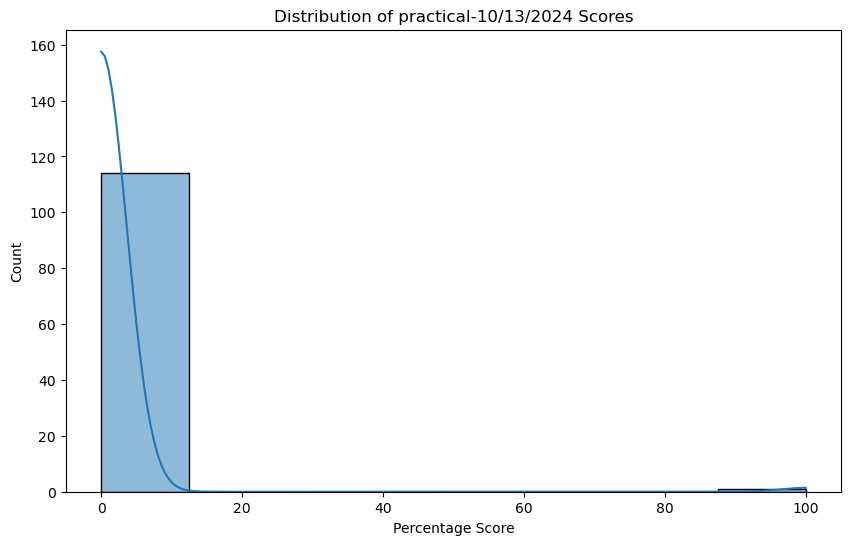

In [12]:
# Analyze performance by assessment
for column in numeric_columns:
    print(f"\n{column} Performance Statistics:")
    print(df[column].describe())
    plot_distribution(df[column], f'Distribution of {column} Scores', 'Percentage Score', 'Count')


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


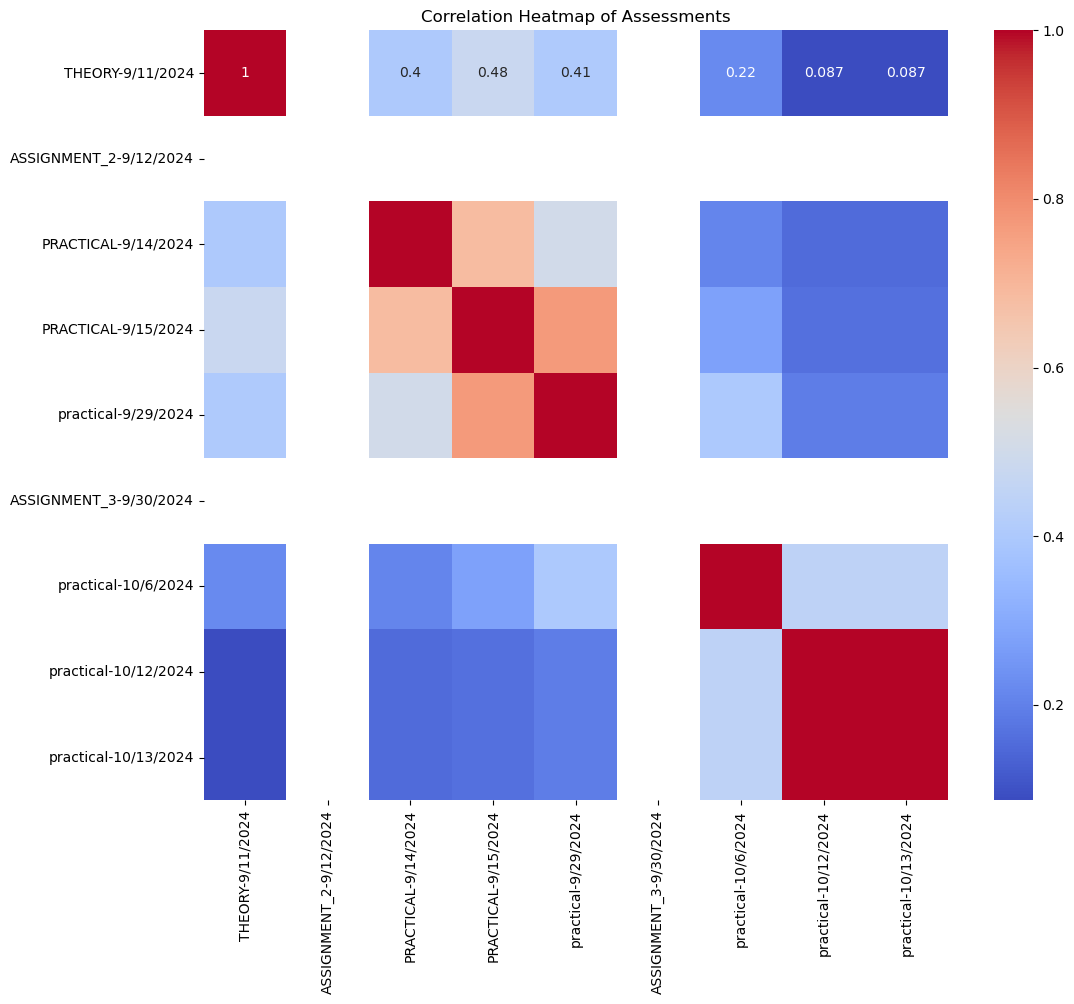

In [13]:
# Correlation heatmap of assessments
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Assessments')
plt.show()

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

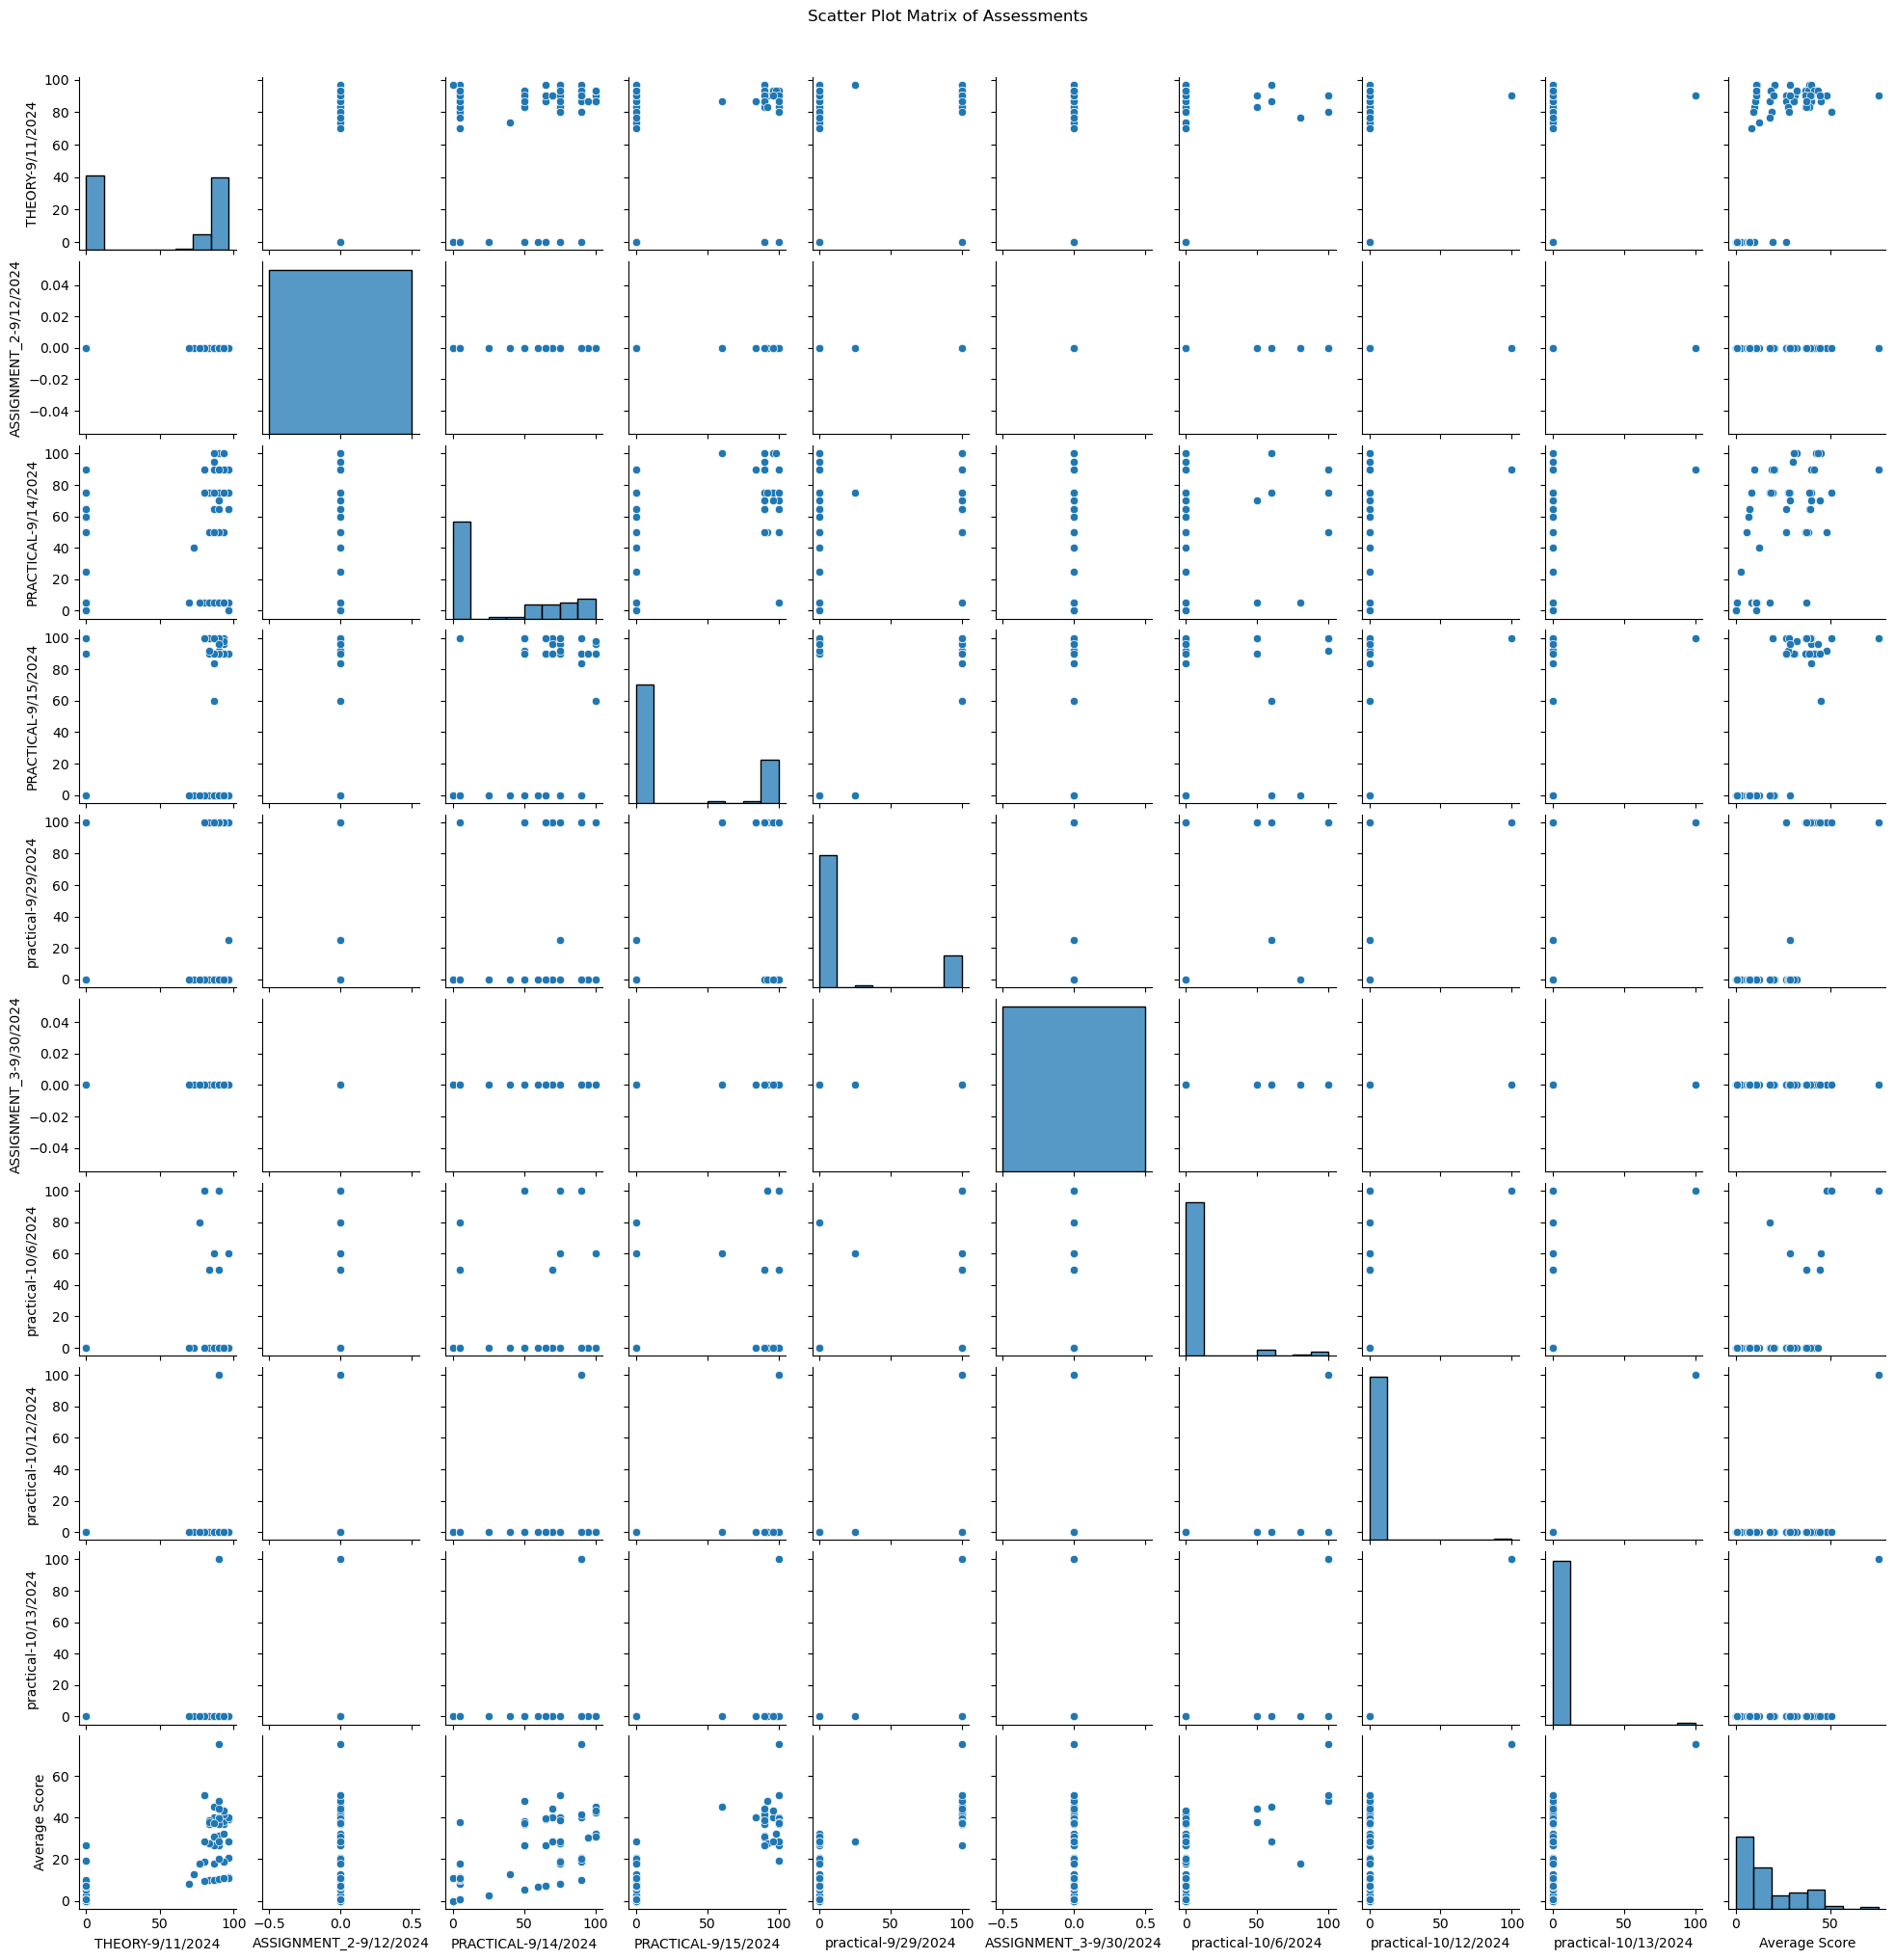

In [14]:
# Scatter plot matrix
sns.pairplot(df[list(numeric_columns) + ['Average Score']], height=2)
plt.suptitle('Scatter Plot Matrix of Assessments', y=1.02)
plt.show()


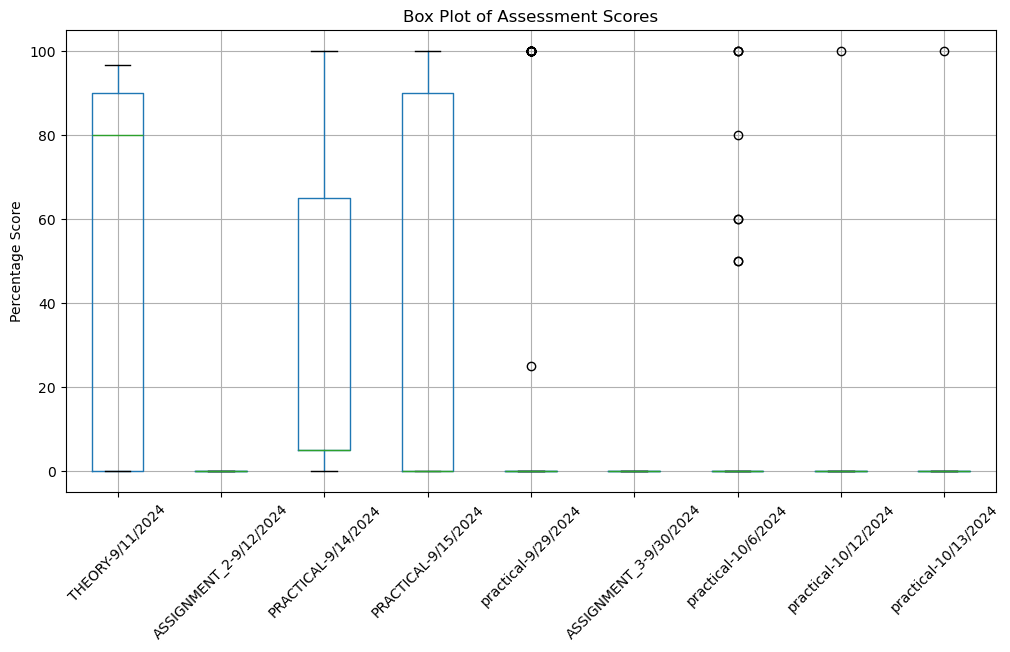

In [15]:
# Box plot of assessment scores
plt.figure(figsize=(12, 6))
df[numeric_columns].boxplot()
plt.title('Box Plot of Assessment Scores')
plt.ylabel('Percentage Score')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Identify students with missing scores (0% after conversion)
missing_scores = (df[numeric_columns] == 0).sum()
print("\nNumber of students with missing scores for each assessment:")
print(missing_scores)



Number of students with missing scores for each assessment:
THEORY-9/11/2024           52
ASSIGNMENT_2-9/12/2024    115
PRACTICAL-9/14/2024         9
PRACTICAL-9/15/2024        83
practical-9/29/2024        92
ASSIGNMENT_3-9/30/2024    115
practical-10/6/2024       107
practical-10/12/2024      114
practical-10/13/2024      114
dtype: int64


In [17]:
# Calculate and display completion rate for each assessment
completion_rate = 1 - (missing_scores / len(df))
print("\nCompletion rate for each assessment:")
print(completion_rate)



Completion rate for each assessment:
THEORY-9/11/2024          0.547826
ASSIGNMENT_2-9/12/2024    0.000000
PRACTICAL-9/14/2024       0.921739
PRACTICAL-9/15/2024       0.278261
practical-9/29/2024       0.200000
ASSIGNMENT_3-9/30/2024    0.000000
practical-10/6/2024       0.069565
practical-10/12/2024      0.008696
practical-10/13/2024      0.008696
dtype: float64


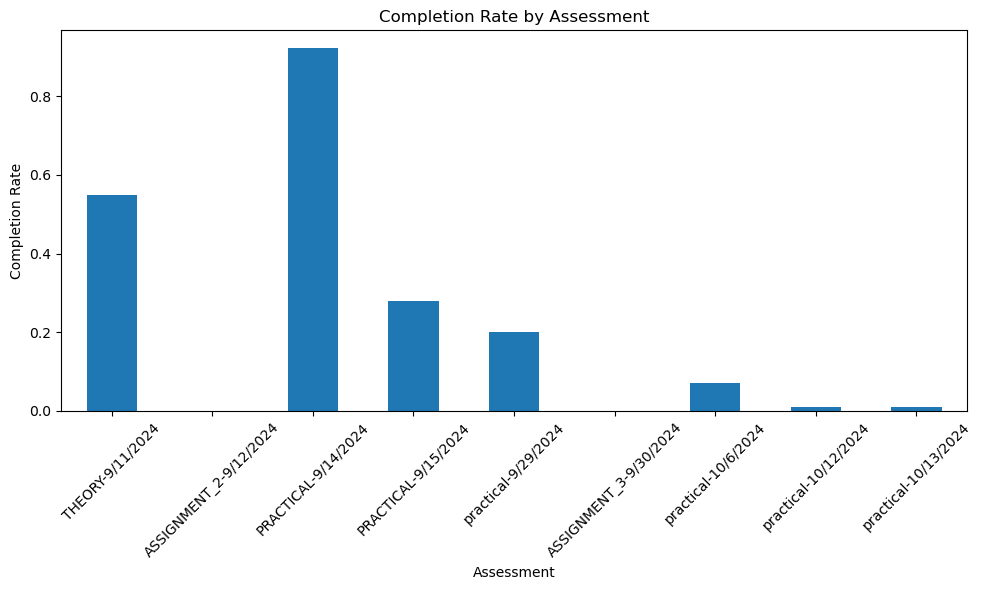

In [18]:
# Plot completion rate
plt.figure(figsize=(10, 6))
completion_rate.plot(kind='bar')
plt.title('Completion Rate by Assessment')
plt.xlabel('Assessment')
plt.ylabel('Completion Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Sort the dataframe by Average Score in descending order
df_sorted = df.sort_values('Average Score', ascending=False)

# Reset the index of the sorted dataframe
df_sorted = df_sorted.reset_index(drop=True)

# Rearrange columns to put Average Score after Email Address
columns_order = columns_to_exclude + ['Average Score'] + list(numeric_columns)
df_sorted = df_sorted[columns_order]

# Export the sorted dataframe to a CSV file
output_file = 'student_performance_sorted.csv'
df_sorted.to_csv(output_file, index=False)

print(f"Data has been sorted by Average Score and exported to {output_file}")


Data has been sorted by Average Score and exported to student_performance_sorted.csv


In [21]:
pip install seaborn


# analyze now class attendance


In [23]:
import matplotlib.pyplot as plt
sns.set()


In [76]:


# Load the Excel file
excel_file_path = 'AI CLASS ATTENDANCE.xlsx'  # Replace with the actual path to your Excel file
excel_data = pd.ExcelFile(excel_file_path)

# View the sheet names
sheet_names = excel_data.sheet_names
print("Available sheets:", sheet_names)


Available sheets: ['29AUGUST2024', '31SEPTEMBER2024', '5SEPTEMBER2024', '12SEPTEMBER2024', '14SEPTEMBER2024', '19SEPTEMBER2024', '21SEPTEMBER2024', '26SEPTEMBER2024', '28SEPTEMBER2024']


In [77]:
# Load the data from a specific sheet
sheet_name = '29AUGUST2024'  # Replace with the name of the sheet you want to view
sheet_data = pd.read_excel(excel_file_path, sheet_name=sheet_name)

# Display the first few rows of the sheet
print(sheet_data.head())


         name  Email  duration(minutes)(id-82753475504) Guest
0    max-time    NaN                                199   NaN
1  kedi James    NaN                                125   Yes
2      Walter    NaN                                127   Yes
3        Kemo    NaN                                 48   Yes
4  Theo Mmuru    NaN                                 75   Yes


In [93]:
def process_attendance_data(sheet_names, file_path):
    # Initialize an empty list to store dataframes
    dfs = []
    
    for sheet in sheet_names:
        # Read each sheet
        df = pd.read_excel(file_path, sheet_name=sheet)
        
        # Print column names to verify the structure
        print(f"Columns in sheet '{sheet}':", df.columns.tolist())
        
        # Extract the max_time from the row with 'max-time'
        max_time_row = df[df.iloc[:, 0].str.contains('max-time', case=False, na=False)]
        
        # If a max-time row is found, get its value and drop that row for calculations
        if not max_time_row.empty:
            max_time = float(max_time_row.iloc[0, 2])  # Assuming the max-time is in the third column
            df = df[df.iloc[:, 0] != max_time_row.iloc[0, 0]]  # Drop the max-time row for further processing
        
        # Check and extract duration columns
        duration_cols = [col for col in df.columns if 'duration' in col.lower()]
        if not duration_cols:
            raise KeyError(f"No duration columns found in sheet '{sheet}'")
        
        # Rename each "duration" column by prepending the sheet name
        renamed_duration_cols = {col: f"{sheet}_{col}" for col in duration_cols}
        df.rename(columns=renamed_duration_cols, inplace=True)

        # Print the DataFrame after renaming columns for debugging
        print(f"DataFrame after renaming columns in sheet '{sheet}':")
        print(df.head())

        # Calculate attendance percentage for each renamed duration column
        for new_col in renamed_duration_cols.values():
            df[new_col] = (df[new_col] / max_time) * 100  # Calculate percentage
            df[new_col] = df[new_col].clip(upper=100)  # Cap at 100%

        # Select necessary columns: 'name' and the renamed duration columns
        df = df[['name'] + list(renamed_duration_cols.values())]
        dfs.append(df)
    
    # Merge all dataframes on the 'name' column
    combined_df = dfs[0]
    for df in dfs[1:]:
        combined_df = pd.merge(combined_df, df, on="name", how="outer")
    
    # Lowercase all names
    combined_df["name"] = combined_df["name"].str.lower()
    
    # Replace NaN with 0 in all attendance percentage columns
    combined_df.fillna(0, inplace=True)

    # Calculate the overall average attendance percentage
    # First, get all columns that start with any sheet name (the new duration columns)
    duration_cols = [col for col in combined_df.columns if any(sheet in col for sheet in sheet_names)]
    
    # Sum attendance values and calculate the average
    combined_df["overall_average_attendance"] = combined_df[duration_cols].replace(0, pd.NA).sum(axis=1) / len(sheet_names)

    # Sort the data by overall average attendance in descending order
    combined_df = combined_df.sort_values("overall_average_attendance", ascending=False)
    
    return combined_df
processed_df = process_attendance_data(sheet_names, excel_file_path)

Columns in sheet '29AUGUST2024': ['name', 'Email', 'duration(minutes)(id-82753475504)', 'Guest']
DataFrame after renaming columns in sheet '29AUGUST2024':
           name  Email  29AUGUST2024_duration(minutes)(id-82753475504) Guest
1    kedi James    NaN                                             125   Yes
2        Walter    NaN                                             127   Yes
3          Kemo    NaN                                              48   Yes
4    Theo Mmuru    NaN                                              75   Yes
5  Daniel Wambi    NaN                                              74   Yes
Columns in sheet '31SEPTEMBER2024': ['name', 'Email', 'duration(minutes)(id-82753475504)', 'Guest']
DataFrame after renaming columns in sheet '31SEPTEMBER2024':
              name  Email  31SEPTEMBER2024_duration(minutes)(id-82753475504)  \
1          Anthony    NaN                                                 63   
2     Fela Oletile    NaN                                     

In [94]:
processed_df = process_attendance_data(sheet_names, excel_file_path)


Columns in sheet '29AUGUST2024': ['name', 'Email', 'duration(minutes)(id-82753475504)', 'Guest']
DataFrame after renaming columns in sheet '29AUGUST2024':
           name  Email  29AUGUST2024_duration(minutes)(id-82753475504) Guest
1    kedi James    NaN                                             125   Yes
2        Walter    NaN                                             127   Yes
3          Kemo    NaN                                              48   Yes
4    Theo Mmuru    NaN                                              75   Yes
5  Daniel Wambi    NaN                                              74   Yes
Columns in sheet '31SEPTEMBER2024': ['name', 'Email', 'duration(minutes)(id-82753475504)', 'Guest']
DataFrame after renaming columns in sheet '31SEPTEMBER2024':
              name  Email  31SEPTEMBER2024_duration(minutes)(id-82753475504)  \
1          Anthony    NaN                                                 63   
2     Fela Oletile    NaN                                     

In [95]:
print(processed_df.head())


                name  29AUGUST2024_duration(minutes)(id-82753475504)  \
7        rose mwangi                                       92.462312   
6        rose mwangi                                       92.462312   
9   nicholas gitonga                                       65.829146   
0         kedi james                                       62.814070   
64      fela oletile                                       52.763819   

    31SEPTEMBER2024_duration(minutes)(id-82753475504)  \
7                                          100.000000   
6                                          100.000000   
9                                           76.923077   
0                                           96.923077   
64                                          96.923077   

    5SEPTEMBER2024_duration(minutes)(id-82753475504)  \
7                                          96.987952   
6                                          96.987952   
9                                          69.879518   


In [96]:
# Overall statistics
overall_stats = processed_df["overall_average_attendance"].describe()
print("Overall Attendance Statistics:")
print(overall_stats)

Overall Attendance Statistics:
count     162.000000
unique    154.000000
top         0.200803
freq        3.000000
Name: overall_average_attendance, dtype: float64


In [97]:
# Top 10 attendees
print("\nTop 5 Attendees:")
print(processed_df[["name", "overall_average_attendance"]].head(10))



Top 5 Attendees:
                     name overall_average_attendance
7             rose mwangi                  89.084583
6             rose mwangi                  88.521995
9        nicholas gitonga                  69.016036
0              kedi james                  66.674666
64           fela oletile                  63.749254
38     celestine sabatian                  60.322855
13        oscar musinguzi                  52.619852
14           martin abuya                  49.583192
10           erick okello                  48.632682
74  isingoma martin frank                  47.870748


In [98]:
# Bottom 5 attendees
print("\nBottom 5 Attendees:")
print(processed_df[["name", "overall_average_attendance"]].tail())



Bottom 5 Attendees:
                           name overall_average_attendance
77               william kanani                   0.111669
62             kenneth williams                   0.111669
125             taremwa danison                   0.066934
72                   hannington                   0.055835
22   167075 kyalo laureen ndanu                   0.055835


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


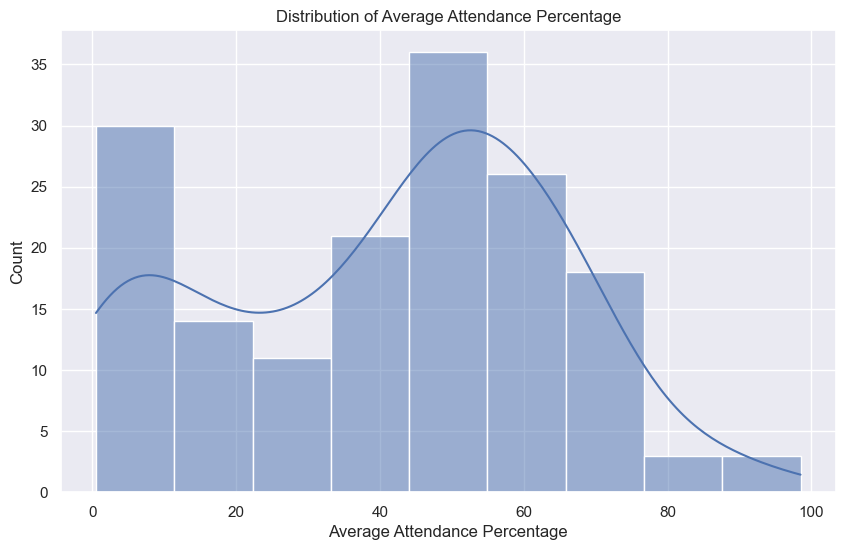

In [58]:
# Attendance distribution
plt.figure(figsize=(10, 6))
sns.histplot(processed_df["overall_average_attendance"], kde=True)
plt.title("Distribution of Average Attendance Percentage")
plt.xlabel("Average Attendance Percentage")
plt.ylabel("Count")
plt.show()


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

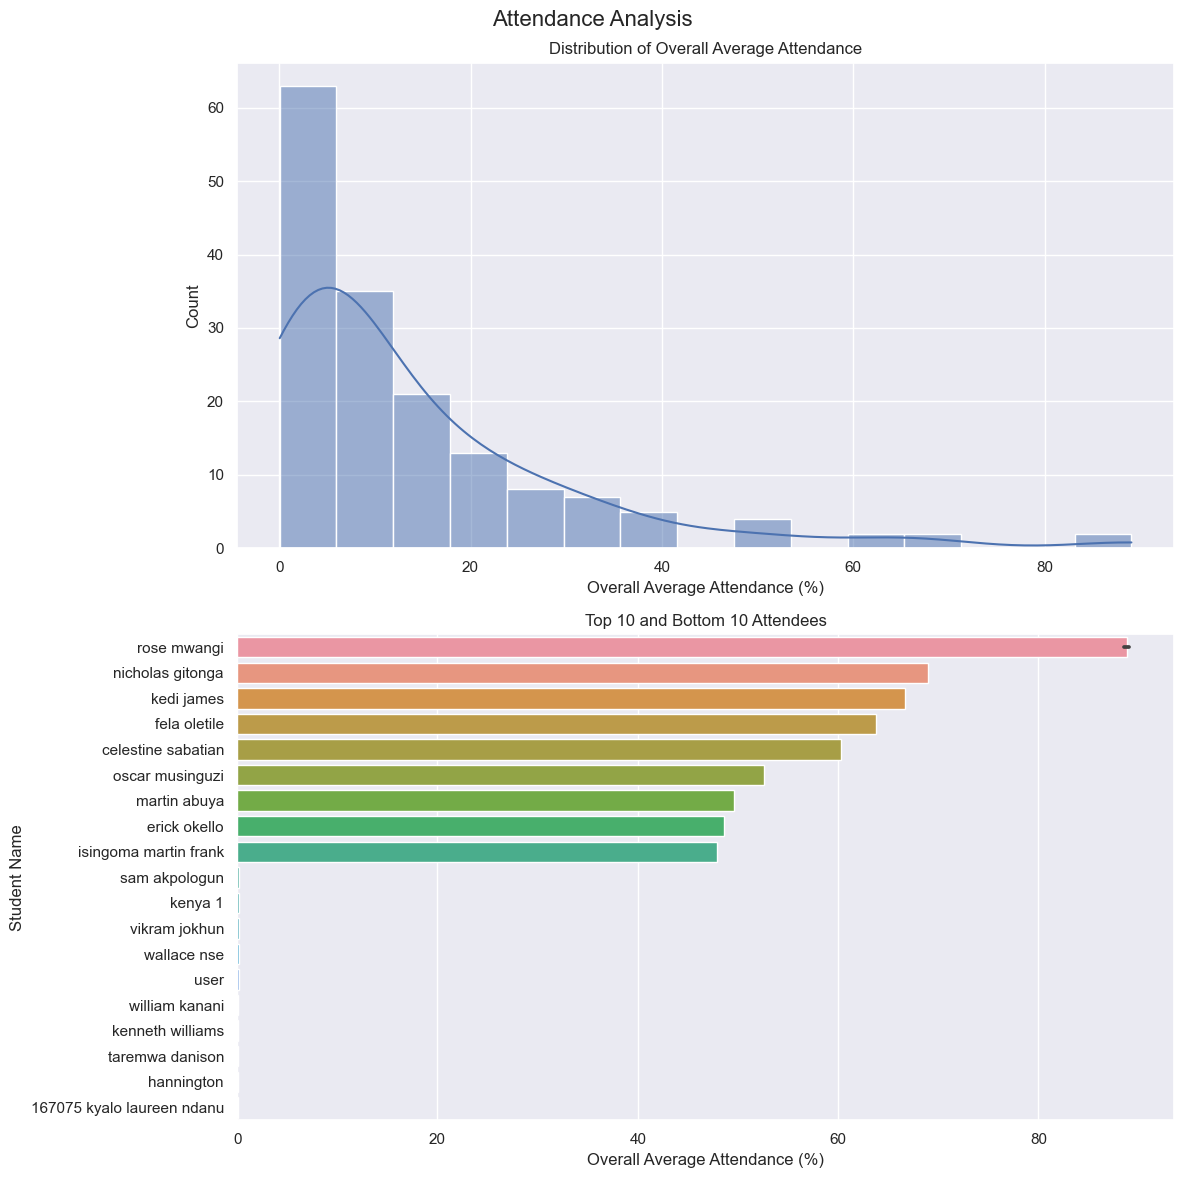

In [99]:
# Set up the plotting area
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
fig.suptitle("Attendance Analysis", fontsize=16)

# 1. Distribution of Overall Average Attendance
sns.histplot(processed_df["overall_average_attendance"], kde=True, ax=ax1)
ax1.set_title("Distribution of Overall Average Attendance")
ax1.set_xlabel("Overall Average Attendance (%)")
ax1.set_ylabel("Count")

# 2. Top and Bottom 10 Attendees
top_bottom_df = pd.concat([processed_df.head(10), processed_df.tail(10)])
sns.barplot(x="overall_average_attendance", y="name", data=top_bottom_df, ax=ax2)
ax2.set_title("Top 10 and Bottom 10 Attendees")
ax2.set_xlabel("Overall Average Attendance (%)")
ax2.set_ylabel("Student Name")

plt.tight_layout()
plt.show()

# Optional: Save the figure
#plt.savefig("attendance_analysis.png", dpi=300, bbox_inches="tight")

In [101]:

# Save processed data to CSV
processed_df.to_csv("processed_attendance_data.csv", index=False)
print("Processed data has been saved to 'processed_attendance_data.csv'")

Processed data has been saved to 'processed_attendance_data.csv'
